In [5]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Recall Goal:

The Goal of the Project 4 is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car.

### What is Image Distortion? (Lesson 4)

Image distortion occurs when a camera looks at 3D objects in the real world and transforms them into a 2D image. Distortion actually changes what the shape and size of these 3D objects appear to be. So the **first step** in analyzing camera images is to undo this distortion so that you can get correct and useful information.

#### Type of Distortions

* **Radial Distortion:** Real cameras use curved lenses to form an image, and light rays often bend a little to much or too little as the edges of these lenses. This creates an effect that distorts the edges of images, so that lines or objects appear more or less curved than they actually are.
* **Tangential Distortion:** Occurs when a camera's lens is not aligned perfectly parallel to the imaging plane, where the camera film or sensor is. This makes the image look tilted so that some objects appear farther away or closer than they actually are.

### Calibrating Your Camera (Lesson 10)

In [6]:
# Arrays to store object points and image points from all the iamges
objpoints = [] # 3D points in real world space
imgpoints = [] # 2d points in the image place

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0)...,(7,5,0)
objp = np.zeros((6*9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9,0:6].T.reshape(-1, 2) # x,y coordinates
# print(objp)

images = glob.glob("./camera_cal/calibration*.jpg")
for fname in images:
    # read in image
    img = mpimg.imread(fname)

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    print(ret)

    # If corners are found, add object points and image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
    
        # draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        
        # write image
        # write_name = 'corners_found' + str(idx) + '.jpg'
        # cv2.imwrite('./corners/' + write_name)

        # plt.imshow(img)
        # cv2.imshow('img', img)
        #cv2.waitKey(500)

# cv2.destroyAllWindows()

False
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
True
True
True


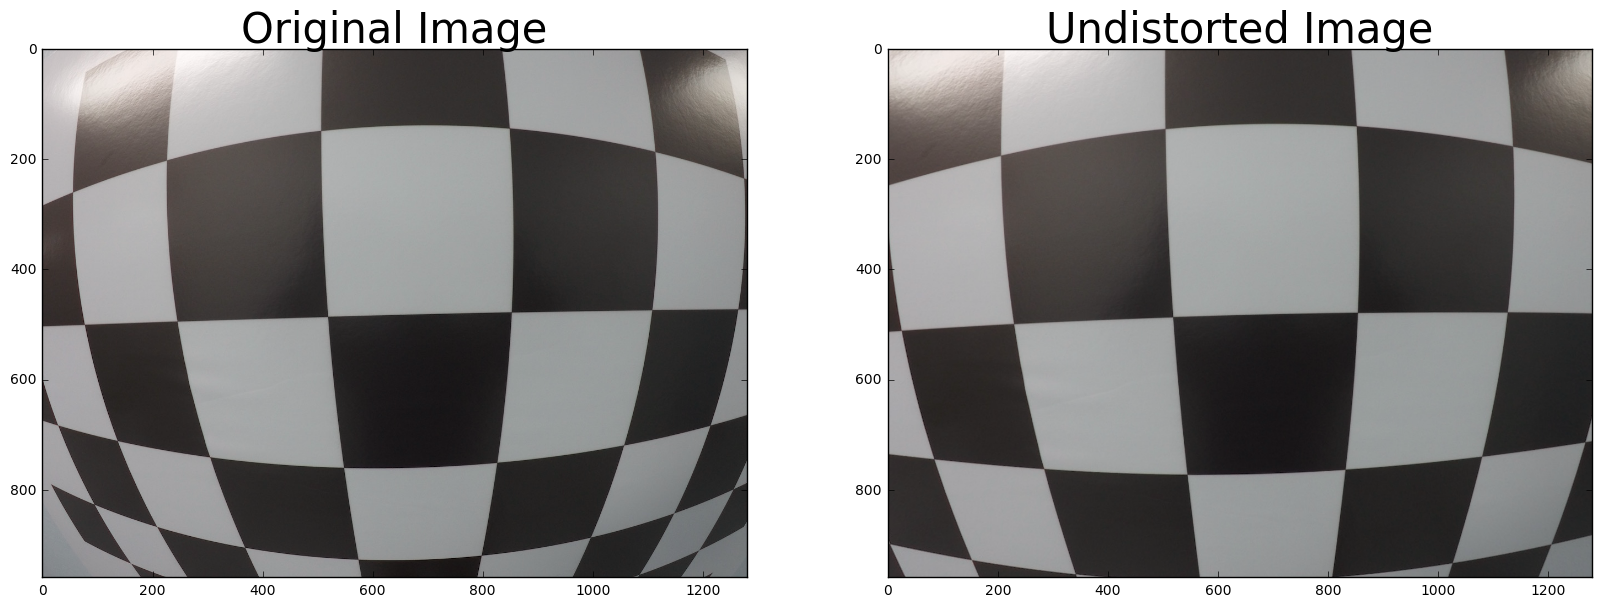

In [7]:
# Test undistortion on an image
img = cv2.imread('./test_images/test_image.jpg')
img_size = (img.shape[1], img.shape[0])
# print(img_size)

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)
# cv2.imwrite('/output_images/test_undist.jpg', dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle, open('./saved_settings/undistort.p', "wb"))
# dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)